# **1. In-place Quick Sort**

In [1]:
import random
import time
import matplotlib.pyplot as plt
%matplotlib inline
import unittest
import numpy as np
import pandas as pd
import sys


In [2]:
Total_execution = [0,0,0,0,0,0]
Compare = [0,0,0,0,0,0]
swap = [0,0,0,0,0,0]
space = [0,0,0,0,0,0]
swaps = 0
comparisons = 0


In [3]:
def partition(arr, low, high):
    global swaps, comparisons  # Use global variables

    pivot = arr[high]
    i = low - 1
    for j in range(low, high):
        comparisons += 1  # Increment comparisons count
        if arr[j] < pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
            swaps += 1  # Increment swaps count
    arr[i + 1], arr[high] = arr[high], arr[i + 1]
    swaps += 1  # Increment swaps count
    return i + 1

In [4]:
def quick_sort(arr, low, high):
    if low < high:
        pivot_index = partition(arr, low, high)
        quick_sort(arr, low, pivot_index - 1)
        quick_sort(arr, pivot_index + 1, high)



Input Size: 10000
Execution Time: 0.06539190001785755 seconds
Number of Swaps: 47467
Number of Comparisons: 578170
------------------------------


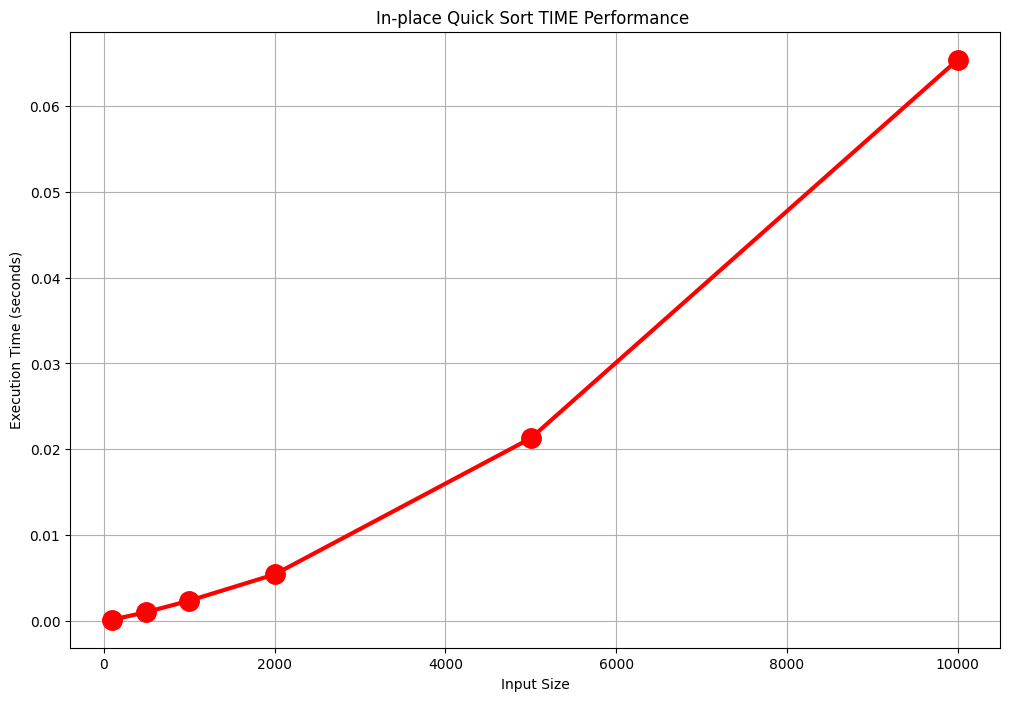

In [5]:
def qs_analyze_time(input_sizes):
    global swaps, comparisons
    execution_times = []
    swaplist = []
    comparelist = []
    space_used = []
    for size in input_sizes:
        arr = [random.randint(1, 100) for i in range(size)]
        global swaps, comparisons
        swaps = 0
        comparisons = 0

        start_time = time.perf_counter()
        quick_sort(arr, 0, len(arr) - 1)
        
        end_time = time.perf_counter()

        execution_times.append(end_time - start_time)
        swaplist.append(swaps)
        comparelist.append(comparisons)
        space_used.append(sys.getsizeof(arr) / (1024 * 1024))
        
    Total_execution[0]=execution_times
    print(f"Input Size: {size}")
    print(f"Execution Time: {end_time - start_time} seconds")
    print(f"Number of Swaps: {swaps}")
    print(f"Number of Comparisons: {comparisons}")
    print("-" * 30)
    swap[0] = swaplist
    Compare[0] = comparelist
    space[0] =space_used
    return execution_times
    
input_sizes = [100, 500, 1000, 2000, 5000,10000]
execution_times = qs_analyze_time(input_sizes)
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(input_sizes, execution_times, marker='o',color='r',markersize=14,linewidth = 3)

plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('In-place Quick Sort TIME Performance ')
plt.grid(True)
plt.show()

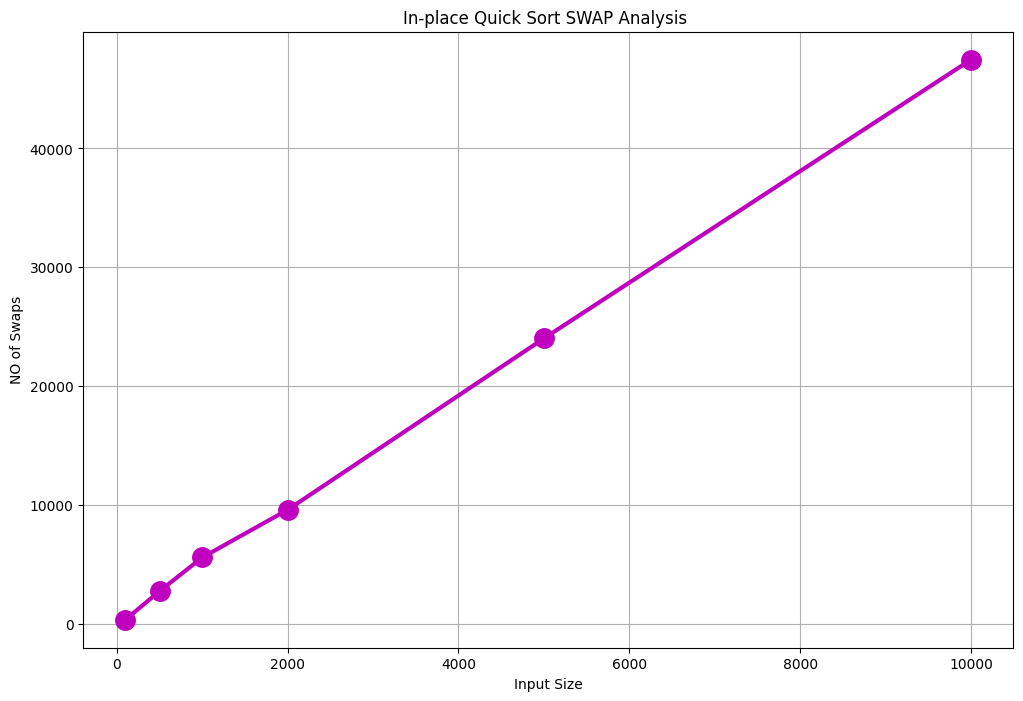

In [6]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(input_sizes, swap[0], marker='o',color='m',markersize=14,linewidth = 3)

plt.xlabel('Input Size')
plt.ylabel('NO of Swaps')
plt.title('In-place Quick Sort SWAP Analysis ')
plt.grid(True)
plt.show()

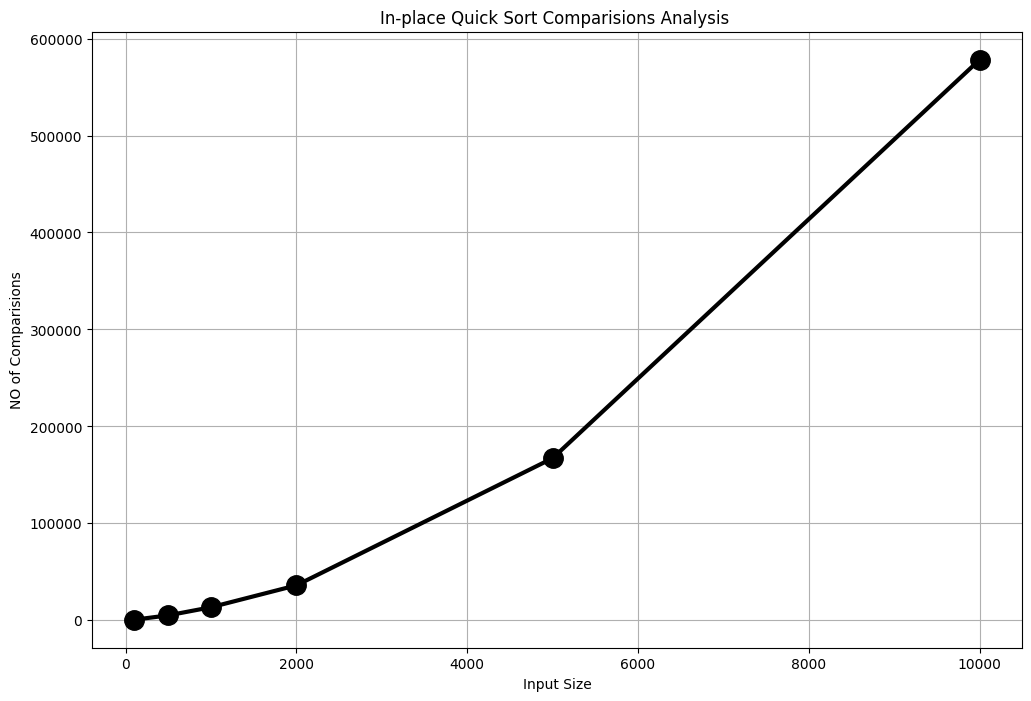

In [7]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(input_sizes, Compare[0], marker='o',color='k',markersize=14,linewidth = 3)

plt.xlabel('Input Size')
plt.ylabel('NO of Comparisions')
plt.title('In-place Quick Sort Comparisions Analysis ')
plt.grid(True)
plt.show()

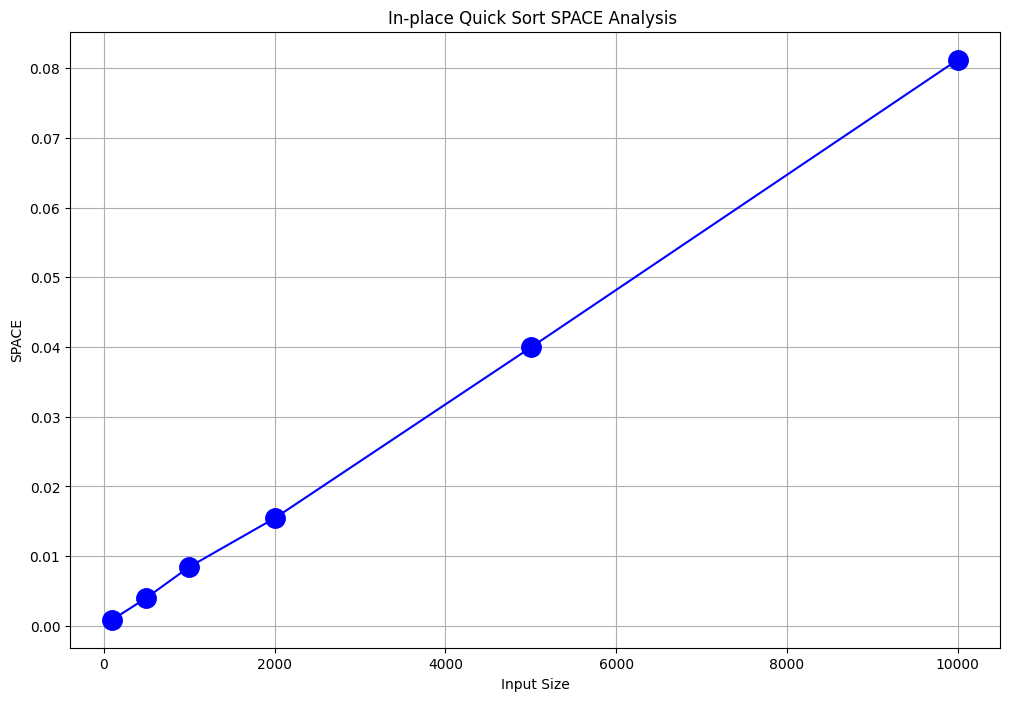

In [8]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(input_sizes, space[0], marker='o',color='b',markersize=14)

plt.xlabel('Input Size')
plt.ylabel('SPACE')
plt.title('In-place Quick Sort SPACE Analysis ')
plt.grid(True)
plt.show()

# **2. Merge Sort**

In [9]:
mergesort_swaps = 0
mergesort_comparisons = 0
def mergesort(arr, low, high):
    global mergesort_swaps, mergesort_comparisons

    if low < high:
        mid = (low + high) // 2
        mergesort(arr, low, mid)
        mergesort(arr, mid + 1, high)
        merge(arr, low, mid, high)
    


In [10]:
def merge(arr, low, mid, high):
    global mergesort_swaps, mergesort_comparisons  # Use global variables
    temp = []
    left = low
    right = mid + 1
    while left <= mid and right <= high:
        mergesort_comparisons += 1  # Increment comparisons count
        if arr[left] < arr[right]:
            temp.append(arr[left])
            left += 1
        else:
            temp.append(arr[right])
            right += 1
    while left <= mid:
        temp.append(arr[left])
        left += 1
    while right <= high:
        temp.append(arr[right])
        right += 1
    for i in range(low, high + 1):
        arr[i] = temp[i - low]
        mergesort_swaps += 1  # Increment swaps count

Input Size: 10000
Execution Time: 0.043724399991333485 seconds
Number of Swaps: 47467
Number of Comparisons: 578170
------------------------------


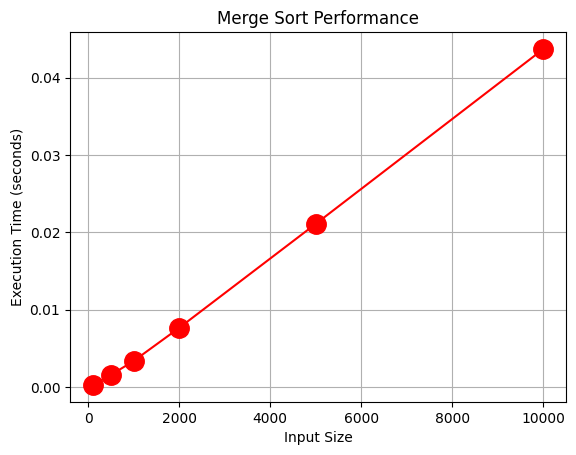

In [11]:
def ms_analyze_time(input_sizes):
    execution_times = []
    swaplist = []
    comparelist = []
    space_used = []
    for size in input_sizes:
        arr = [random.randint(1, 100) for i in range(size)]
        global mergesort_swaps, mergesort_comparisons
        start_time = time.perf_counter()
        mergesort(arr, 0, len(arr) - 1)
        swaplist.append(mergesort_swaps)
        comparelist.append(mergesort_comparisons)
        space_used.append(sys.getsizeof(arr) / (1024 * 1024))
        end_time = time.perf_counter()

        execution_times.append(end_time - start_time)
    Total_execution[1] = execution_times
    print(f"Input Size: {size}")
    print(f"Execution Time: {end_time - start_time} seconds")
    print(f"Number of Swaps: {swaps}")
    print(f"Number of Comparisons: {comparisons}")
    print("-" * 30)
    swap[1] = swaplist
    Compare[1] = comparelist
    space[1] = space_used
    return execution_times
    

input_sizes = [100, 500, 1000, 2000, 5000,10000]
execution_times = ms_analyze_time(input_sizes)

plt.plot(input_sizes, execution_times, marker='o',color='r',markersize=14)
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Merge Sort Performance')
plt.grid(True)
plt.show()

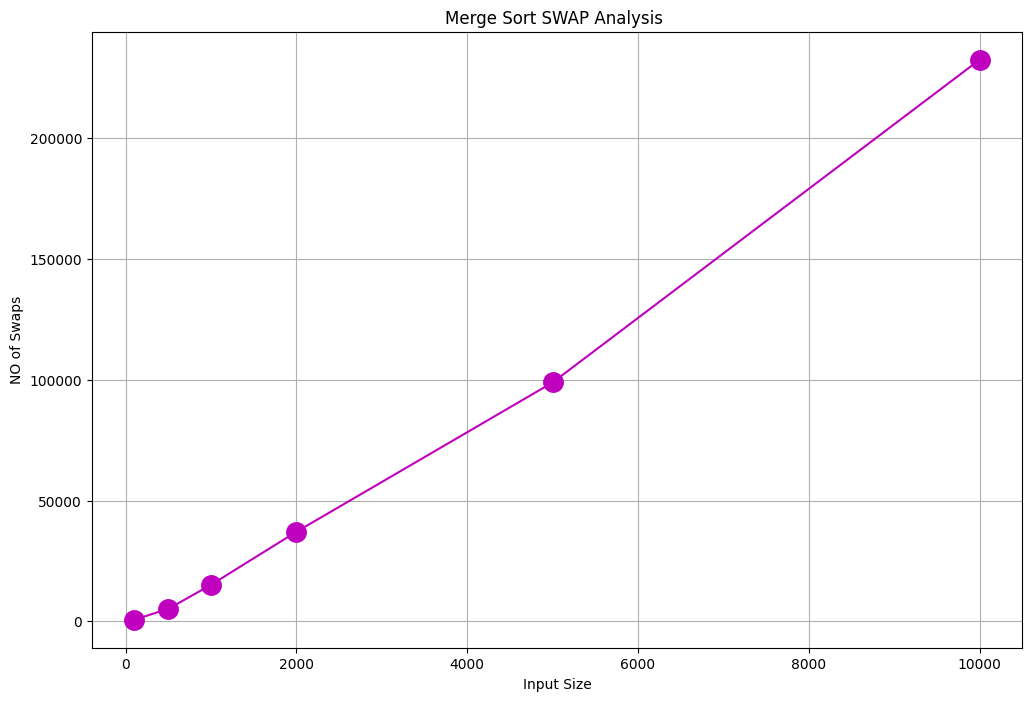

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.plot(input_sizes, swap[1], marker='o',color='m',markersize=14)

plt.xlabel('Input Size')
plt.ylabel('NO of Swaps')
plt.title('Merge Sort SWAP Analysis ')
plt.grid(True)
plt.show()



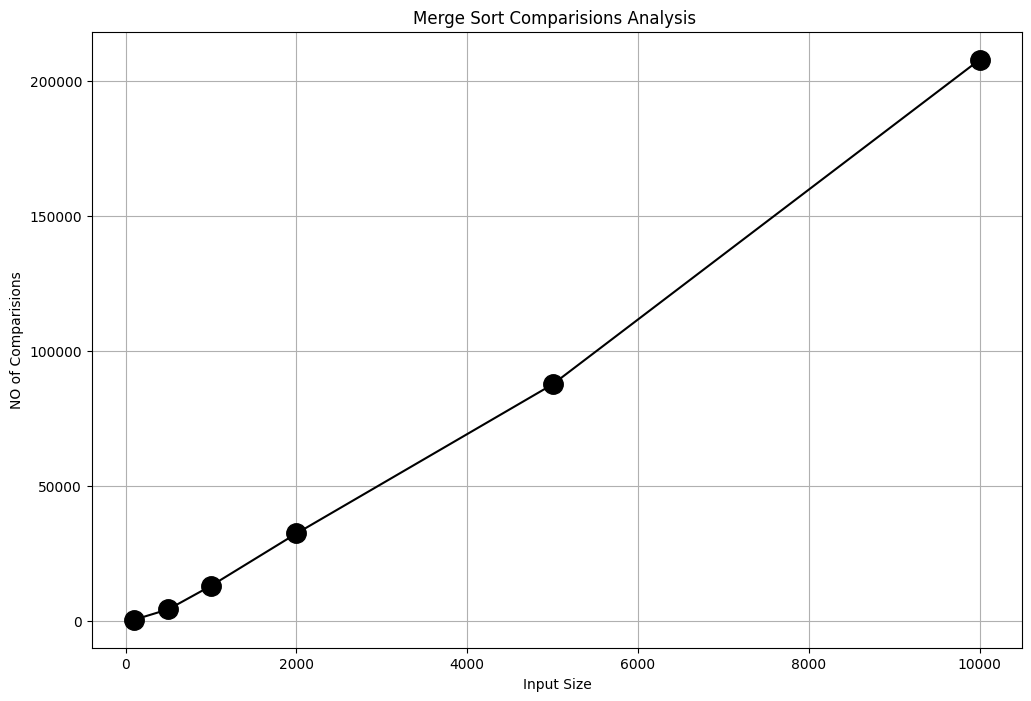

In [13]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(input_sizes, Compare[1], marker='o',color='k',markersize=14)

plt.xlabel('Input Size')
plt.ylabel('NO of Comparisions')
plt.title('Merge Sort Comparisions Analysis ')
plt.grid(True)
plt.show()

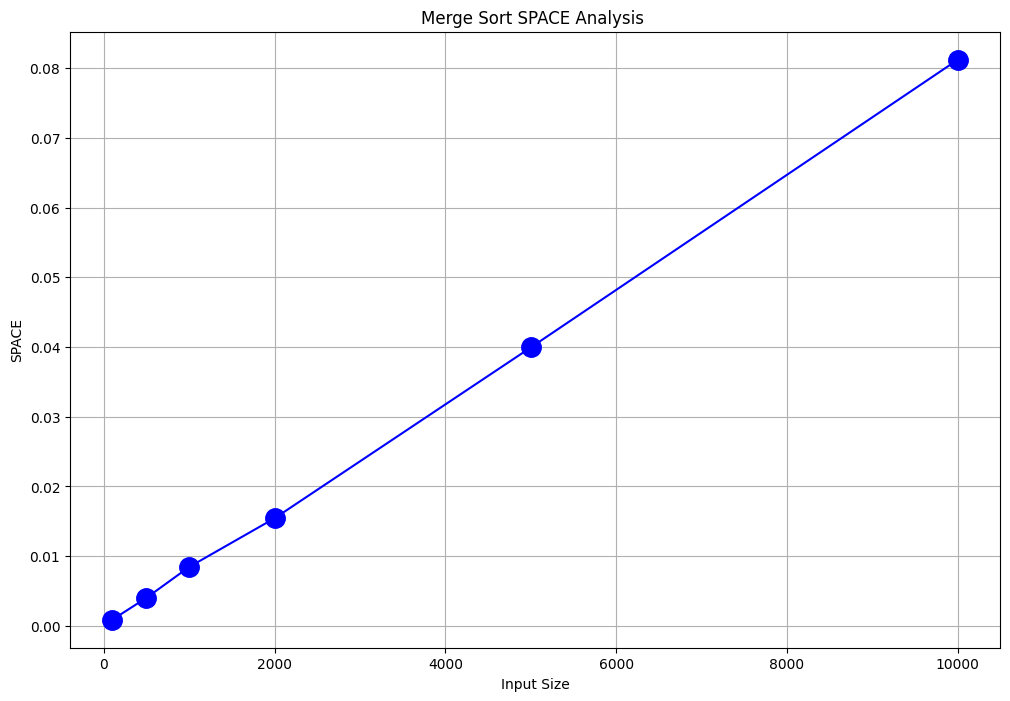

In [14]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(input_sizes, space[1], marker='o',color='b',markersize=14)

plt.xlabel('Input Size')
plt.ylabel('SPACE')
plt.title('Merge Sort SPACE Analysis ')
plt.grid(True)
plt.show()

# **3. In-place Heap Sort**

In [15]:
class BinaryHeap:
    def __init__(self):
        self.heap = []
        mergesort_swaps

    def heapify(self, index, heap_size):
        largest = index
        left_child_index = 2 * index + 1
        right_child_index = 2 * index + 2

        if left_child_index < heap_size and self.heap[left_child_index] > self.heap[largest]:
            largest = left_child_index

        if right_child_index < heap_size and self.heap[right_child_index] > self.heap[largest]:
            largest = right_child_index

        if largest != index:
            self.heap[index], self.heap[largest] = self.heap[largest], self.heap[index]
            self.heapify(largest, heap_size)

    def insert(self, item):
        self.heap.append(item)
        index = len(self.heap) - 1
        while index > 0:
            parent_index = (index - 1) // 2
            if self.heap[index] <= self.heap[parent_index]:
                break
            self.heap[index], self.heap[parent_index] = self.heap[parent_index], self.heap[index]
            index = parent_index

    def remove_max(self):
        if not self.heap:
            return None

        if len(self.heap) == 1:
            return self.heap.pop()

        max_value = self.heap[0]
        self.heap[0] = self.heap.pop()
        self.heapify(0, len(self.heap))
        return max_value





In [16]:
def in_place_heap_sort(arr):
    global mergesort_swaps, mergesort_comparisons
    
    n = len(arr)
    mergesort_swaps = 0
    mergesort_comparisons = 0
    # Create a binary heap and insert the elements
    heap = BinaryHeap()
    for i in range(n):
        heap.insert(arr[i])

    # Remove the maximum element from the heap and place it at the end of the array
    for i in range(n - 1, -1, -1):
        arr[i] = heap.remove_max()
        mergesort_swaps += 1
    mergesort_comparisons = n * (n - 1) // 2 

Input Size: 10000
Execution Time: 0.047595699987141415 seconds
Number of Swaps: 10000
Number of Comparisons: 578170
------------------------------


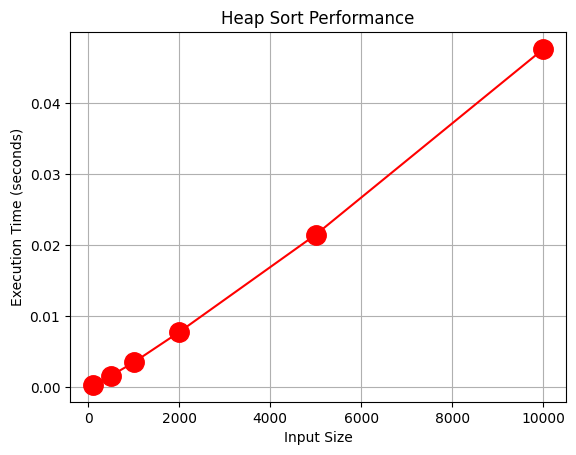

In [17]:
def hs_analyze_time(input_sizes):
    execution_times = []
    swaplist = []
    comparelist = []
    space_used = []
    global mergesort_swaps, mergesort_comparisons
    for size in input_sizes:
        arr = [random.randint(1, 100) for i in range(size)]

        start_time = time.perf_counter()
        in_place_heap_sort(arr)
        end_time = time.perf_counter()

        execution_times.append(end_time - start_time)
        swaplist.append(mergesort_swaps)
        comparelist.append(mergesort_comparisons)
        space_used.append(sys.getsizeof(arr) / (1024 * 1024))

    Total_execution[2] = execution_times
    print(f"Input Size: {size}")
    print(f"Execution Time: {end_time - start_time} seconds")
    print(f"Number of Swaps: {mergesort_swaps}")
    print(f"Number of Comparisons: {comparisons}")
    print("-" * 30)
    swap[2] = swaplist
    Compare[2] = comparelist
    space[2] = space_used
    return execution_times

input_sizes = [100, 500, 1000, 2000, 5000,10000]
execution_times = hs_analyze_time(input_sizes)

plt.plot(input_sizes, execution_times, marker='o',color='r',markersize=14)
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Heap Sort Performance')
plt.grid(True)
plt.show()

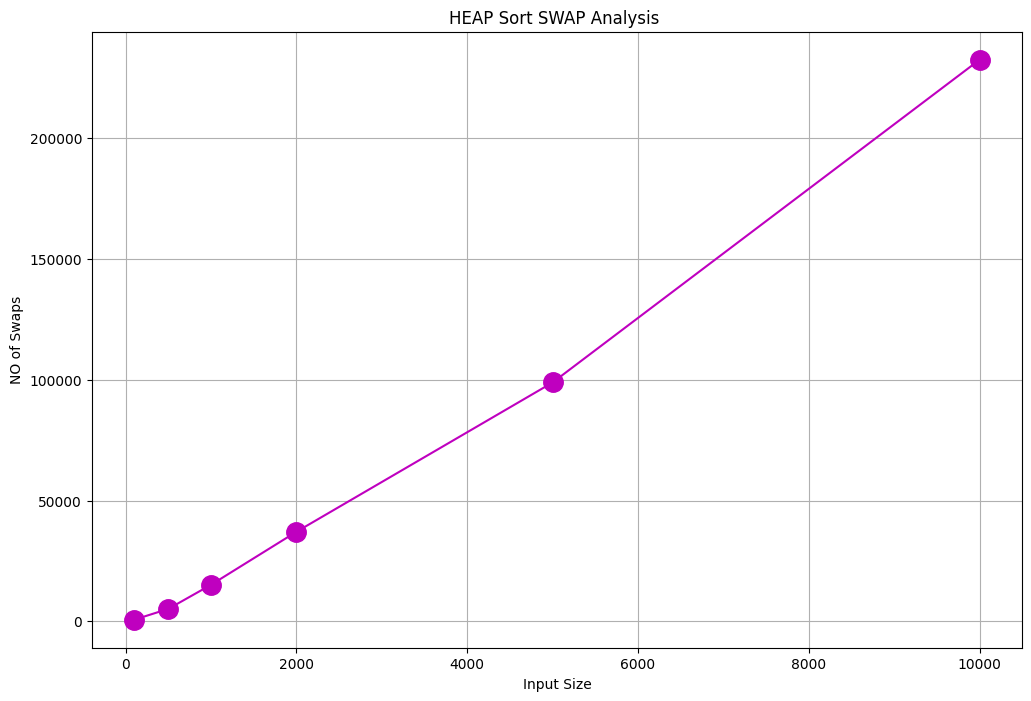

In [18]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.plot(input_sizes, swap[1], marker='o',color='m',markersize=14)

plt.xlabel('Input Size')
plt.ylabel('NO of Swaps')
plt.title('HEAP Sort SWAP Analysis ')
plt.grid(True)
plt.show()



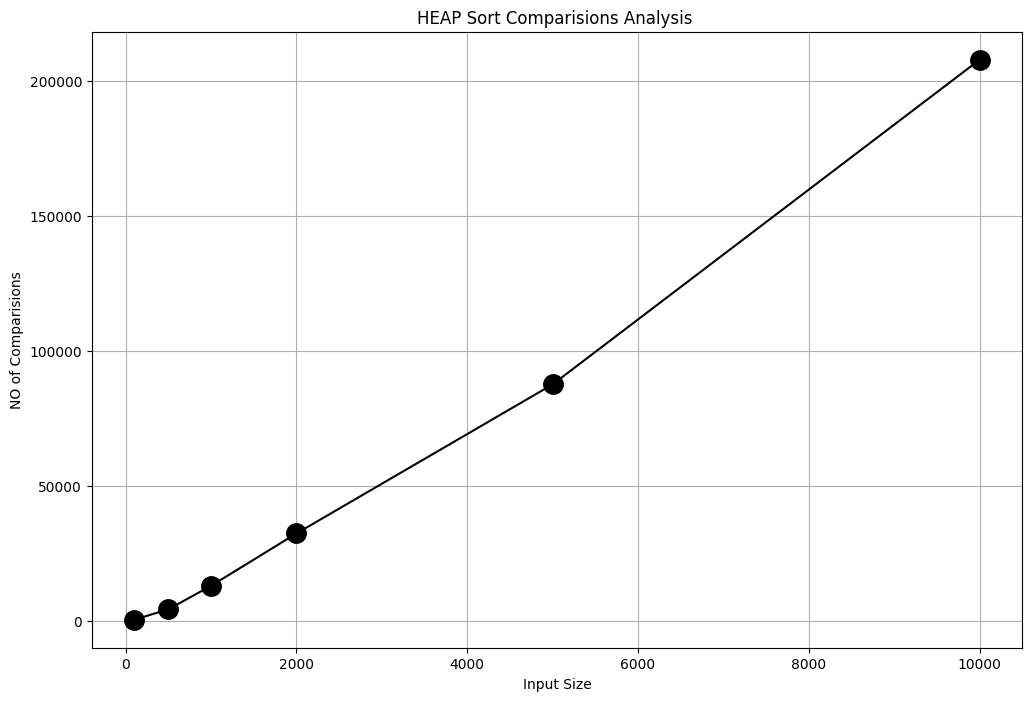

In [19]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(input_sizes, Compare[1], marker='o',color='k',markersize=14)

plt.xlabel('Input Size')
plt.ylabel('NO of Comparisions')
plt.title('HEAP Sort Comparisions Analysis ')
plt.grid(True)
plt.show()

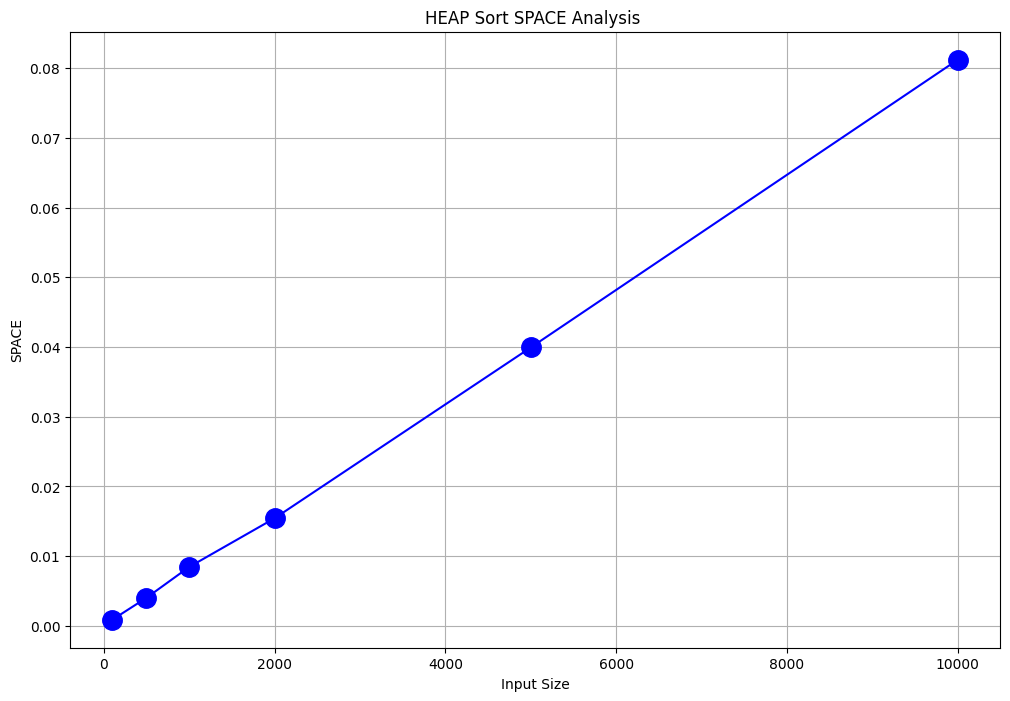

In [20]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(input_sizes, space[1], marker='o',color='b',markersize=14)

plt.xlabel('Input Size')
plt.ylabel('SPACE')
plt.title('HEAP Sort SPACE Analysis ')
plt.grid(True)
plt.show()

 # **4. Insertion Sort**

In [21]:
def insertion_sort(a):
    global isort_swaps, isort_comparisons
    isort_swaps = 0
    isort_comparisons = 0
    n = len(a)
    

    for i in range(1, n):
        key = a[i]
        j = i - 1

        while j >= 0 and a[j] > key:
            a[j + 1] = a[j]
            j -= 1
            isort_swaps += 1  # Increment swaps count
            isort_comparisons += 1  # Increment comparisons count

        a[j + 1] = key

    
    

Input Size: 10000
Execution Time: 3.7538440227508545 seconds
Number of Swaps: 10000
Number of Comparisons: 578170
------------------------------


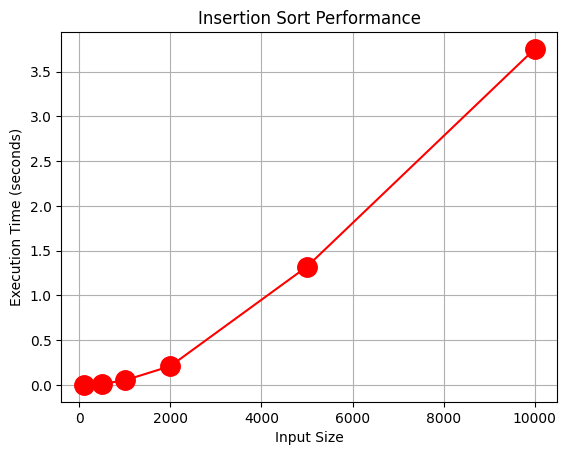

In [22]:
def is_analyze_time(input_sizes):
    execution_times = []
    swaplist = []
    comparelist = []
    space_used = []
    global isort_swaps, isort_comparisons

    for size in input_sizes:
        arr = [random.randint(1, 100) for i in range(size)]

        start_time = time.time()
        insertion_sort(arr)
        end_time = time.time()

        execution_times.append(end_time - start_time)
        swaplist.append(isort_swaps)
        comparelist.append(isort_comparisons)
        space_used.append(sys.getsizeof(arr) / (1024 * 1024))

    Total_execution[3] = execution_times
    print(f"Input Size: {size}")
    print(f"Execution Time: {end_time - start_time} seconds")
    print(f"Number of Swaps: {mergesort_swaps}")
    print(f"Number of Comparisons: {comparisons}")
    print("-" * 30)
    swap[3] = swaplist
    Compare[3] = comparelist
    space[3] = space_used
    return execution_times

input_sizes = [100, 500, 1000, 2000, 5000,10000]
execution_times = is_analyze_time(input_sizes)

plt.plot(input_sizes, execution_times, marker='o',color='r',markersize=14)
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Insertion Sort Performance')
plt.grid(True)
plt.show()

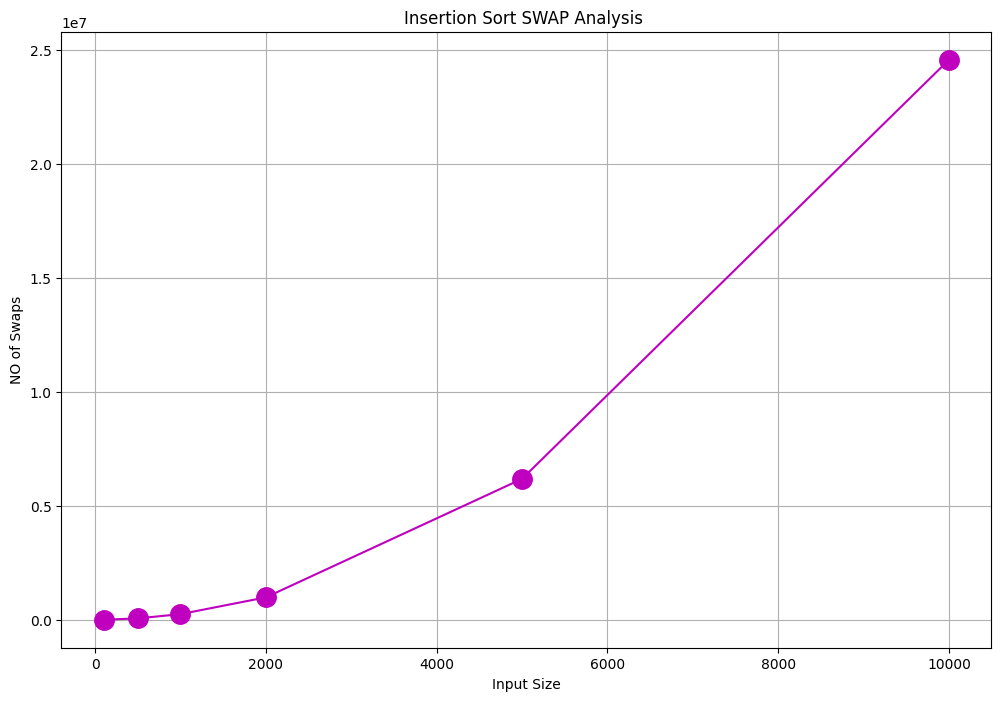

In [23]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.plot(input_sizes, swap[3], marker='o',color='m',markersize=14)

plt.xlabel('Input Size')
plt.ylabel('NO of Swaps')
plt.title('Insertion Sort SWAP Analysis ')
plt.grid(True)
plt.show()



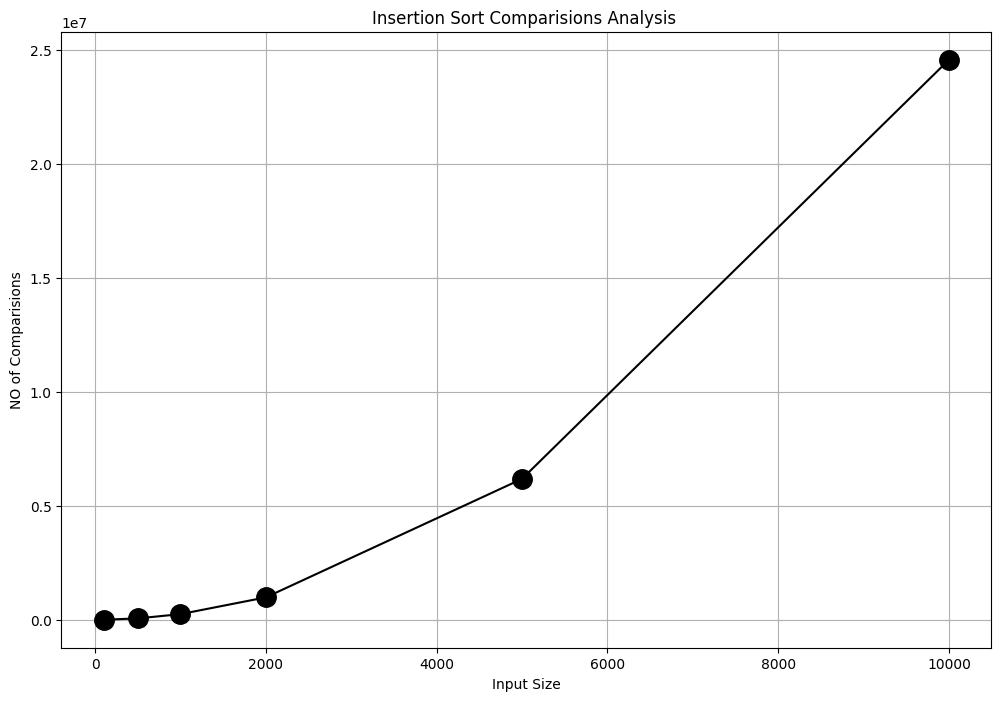

In [24]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(input_sizes, Compare[3], marker='o',color='k',markersize=14)

plt.xlabel('Input Size')
plt.ylabel('NO of Comparisions')
plt.title('Insertion Sort Comparisions Analysis ')
plt.grid(True)
plt.show()

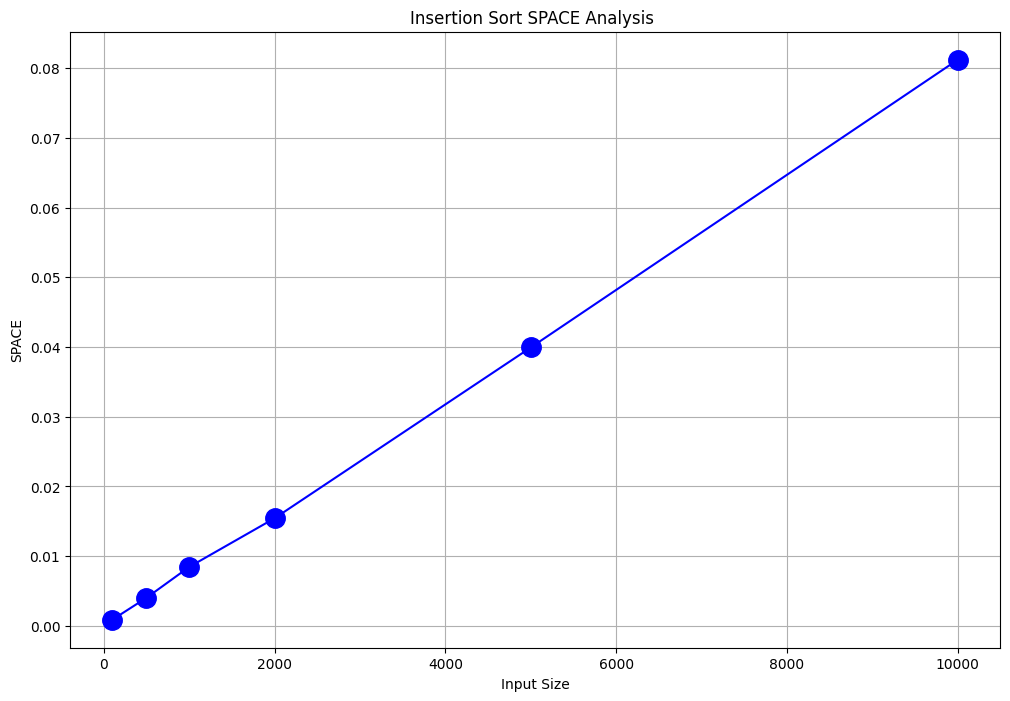

In [25]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(input_sizes, space[3], marker='o',color='b',markersize=14)

plt.xlabel('Input Size')
plt.ylabel('SPACE')
plt.title('Insertion Sort SPACE Analysis ')
plt.grid(True)
plt.show()

# **5. Bucket Sort**

In [26]:
def bucket_sort(arr):
    if len(arr) == 0:
        return arr

    # Find the maximum and minimum values in the input array
    max_val = max(arr)
    min_val = min(arr)

    # Determine the range for each bucket
    bucket_range = (max_val - min_val) / len(arr)

    # Create an empty list of buckets
    num_buckets = len(arr) + 1  # Increase the number of buckets by 1 to prevent out-of-range errors
    buckets = [[] for _ in range(num_buckets)]

    # Place each element in its corresponding bucket
    for num in arr:
        index_b = int((num - min_val) / bucket_range)
        buckets[index_b].append(num)

    # Sort each bucket and concatenate them to get the sorted output
    sorted_arr = []
    for bucket in buckets:
        bucket.sort()
        sorted_arr.extend(bucket)

    return sorted_arr




Input Size: 10000
Execution Time: 0.10195109999040142 seconds
Number of Swaps: NO SWAPS
Number of Comparisons: NO COMPARISONS
------------------------------


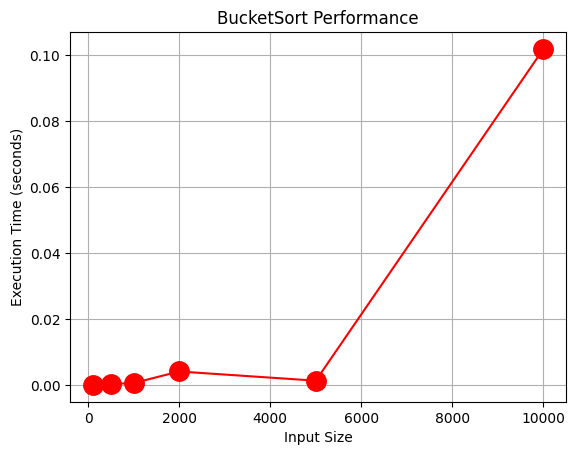

In [27]:
def bs_analyze_time(input_sizes):
    execution_times = []
    space_used = []

    for size in input_sizes:
        arr = [random.randint(1, 100) for i in range(size)]

        start_time = time.perf_counter()
        bucket_sort(arr)
        end_time = time.perf_counter()

        
        execution_times.append(end_time - start_time)
        space_used.append(sys.getsizeof(arr) / (1024 * 1024))
    Total_execution[4] = execution_times
    print(f"Input Size: {size}")
    print(f"Execution Time: {end_time - start_time} seconds")
    print(f"Number of Swaps: NO SWAPS")
    print(f"Number of Comparisons: NO COMPARISONS")
    print("-" * 30)
    
    space[4] = space_used
    return execution_times

input_sizes = [100, 500, 1000, 2000, 5000,10000]
execution_times = bs_analyze_time(input_sizes)

plt.plot(input_sizes, execution_times, marker='o',color='r',markersize=14)
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('BucketSort Performance')
plt.grid(True)
plt.show()

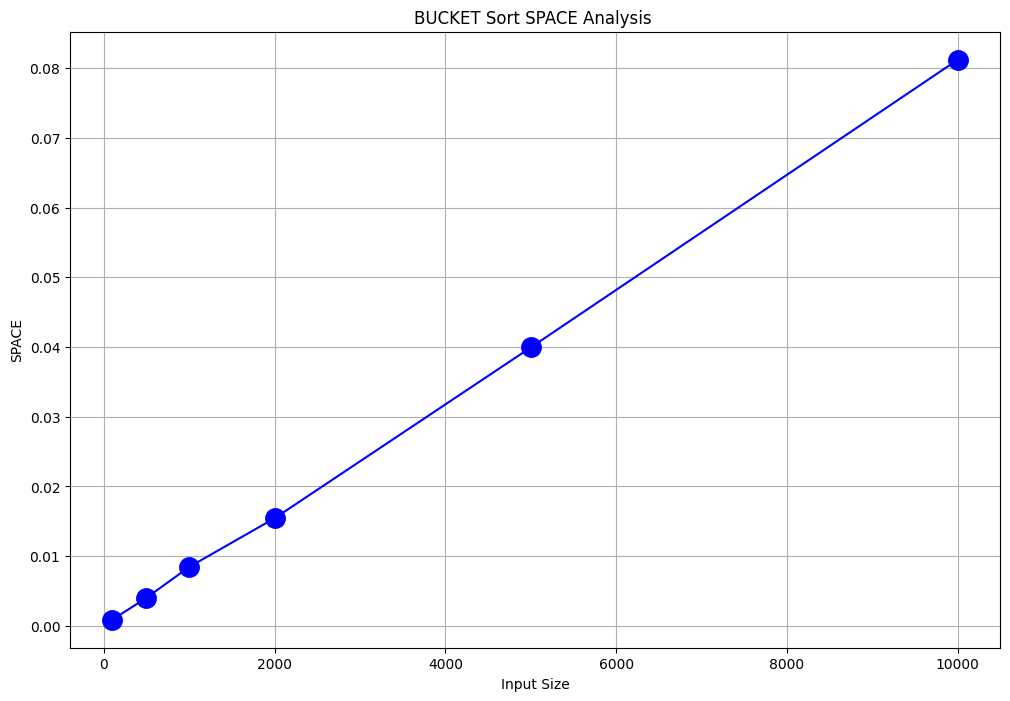

In [28]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(input_sizes, space[4], marker='o',color='b',markersize=14)

plt.xlabel('Input Size')
plt.ylabel('SPACE')
plt.title('BUCKET Sort SPACE Analysis ')
plt.grid(True)
plt.show()

 # **6. Radix Sort**

In [29]:
def counting_sort(arr, exp):
    n = len(arr)
    output = [0] * n
    count = [0] * 10

    # Count occurrences of each digit in the current place value
    for i in range(n):
        index = arr[i] // exp
        count[index % 10] += 1

    # Calculate cumulative count to determine positions
    for i in range(1, 10):
        count[i] += count[i - 1]

    # Build the output array in sorted order
    i = n - 1
    while i >= 0:
        index = arr[i] // exp
        output[count[index % 10] - 1] = arr[i]
        count[index % 10] -= 1
        i -= 1

    # Copy the sorted elements back to the original array
    for i in range(n):
        arr[i] = output[i]




In [30]:
def radix_sort(arr):
    if not arr:
        return arr

    max_val = max(arr)
    exp = 1
    comparisons = 0
    swaps = 0

    while max_val // exp > 0:
        counting_sort(arr, exp)
        exp *= 10

    return arr





Input Size: 10000
Execution Time: 0.007686099997954443 seconds
Number of Swaps: 10000
Number of Comparisons: 100000
------------------------------


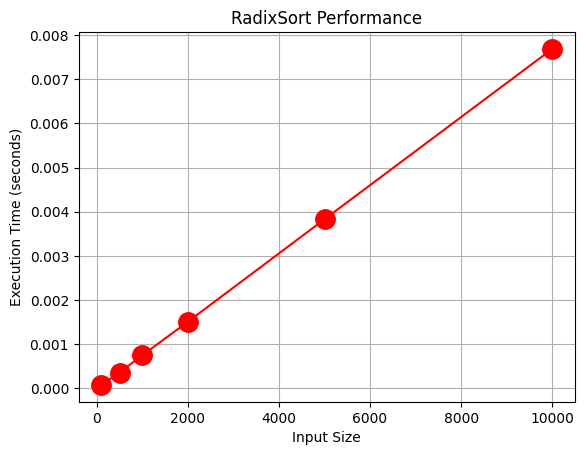

In [31]:
def rs_analyze_time(input_sizes):
    execution_times = []
    swaplist = []
    comparelist = []
    space_used = []

    for size in input_sizes:
        arr = [random.randint(1, 100) for i in range(size)]

        start_time = time.perf_counter()
        radix_sort(arr)
        end_time = time.perf_counter()
        
        
        execution_times.append(end_time - start_time)
        
        num_comparisons = len(arr) * 10
        

        swaplist.append(0)
        comparelist.append(num_comparisons)
        space_used.append(sys.getsizeof(arr) / (1024 * 1024))

    Total_execution[5] = execution_times
    print(f"Input Size: {size}")
    print(f"Execution Time: {end_time - start_time} seconds")
    print(f"Number of Swaps: {mergesort_swaps}")
    print(f"Number of Comparisons: {comparelist[5]}")
    print("-" * 30)
    swap[5] = swaplist
    Compare[5] = comparelist
    space[5] = space_used
    return execution_times

input_sizes = [100, 500, 1000, 2000, 5000,10000]
execution_times = rs_analyze_time(input_sizes)

plt.plot(input_sizes, execution_times, marker='o',color='r',markersize=14)
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('RadixSort Performance')
plt.grid(True)
plt.show()

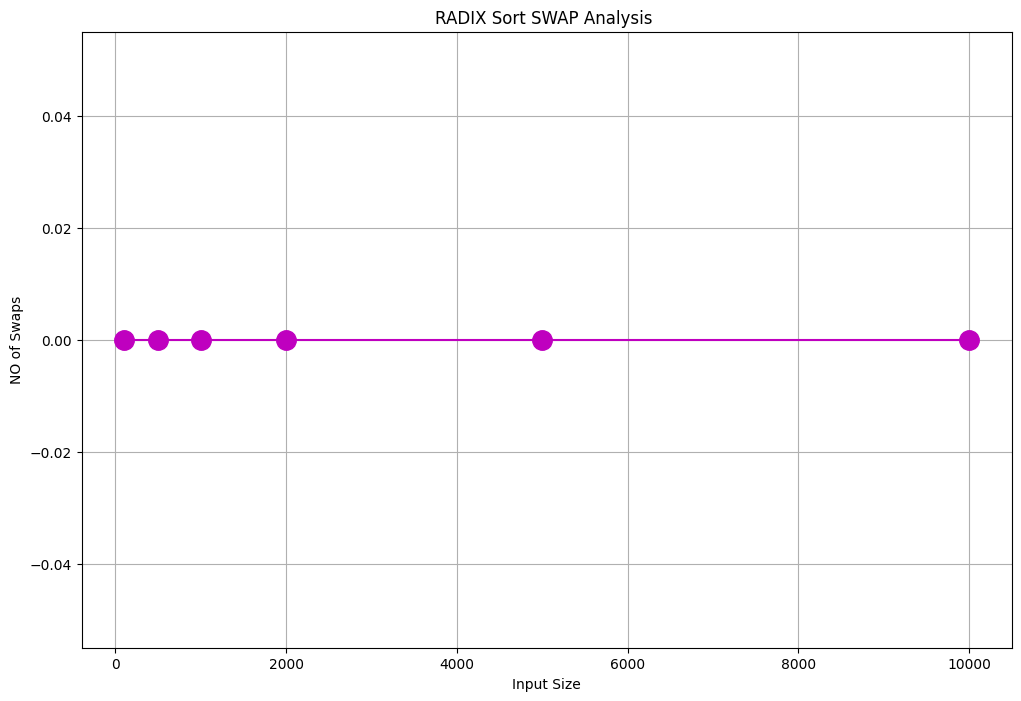

In [32]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.plot(input_sizes, swap[5], marker='o',color='m',markersize=14)

plt.xlabel('Input Size')
plt.ylabel('NO of Swaps')
plt.title('RADIX Sort SWAP Analysis ')
plt.grid(True)
plt.show()



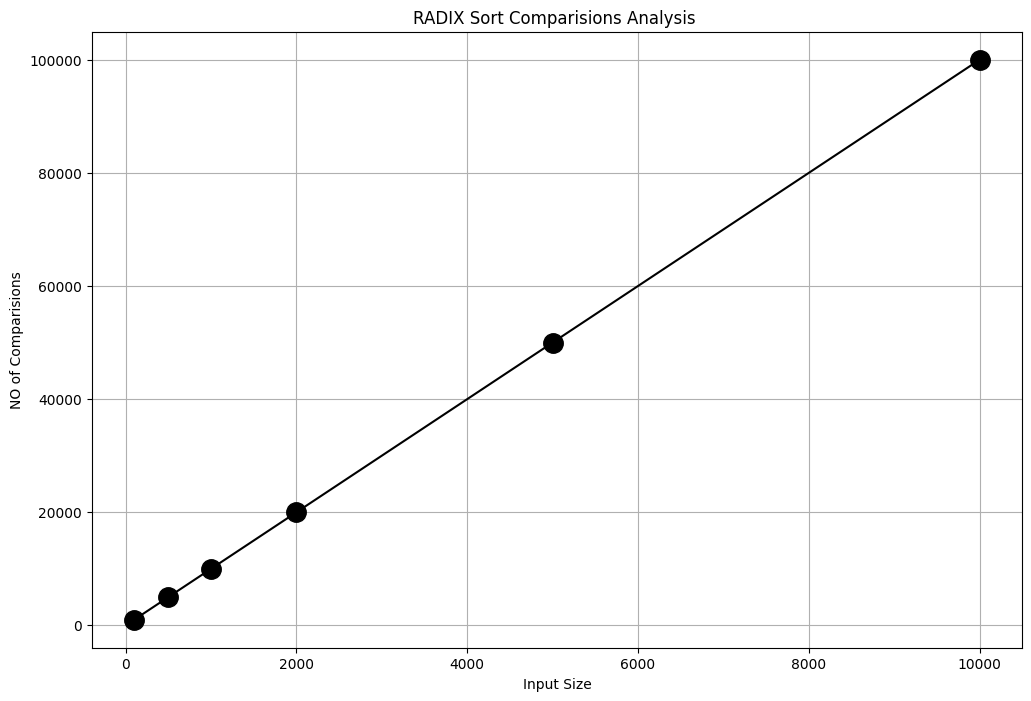

In [33]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(input_sizes, Compare[5], marker='o',color='k',markersize=14)

plt.xlabel('Input Size')
plt.ylabel('NO of Comparisions')
plt.title('RADIX Sort Comparisions Analysis ')
plt.grid(True)
plt.show()

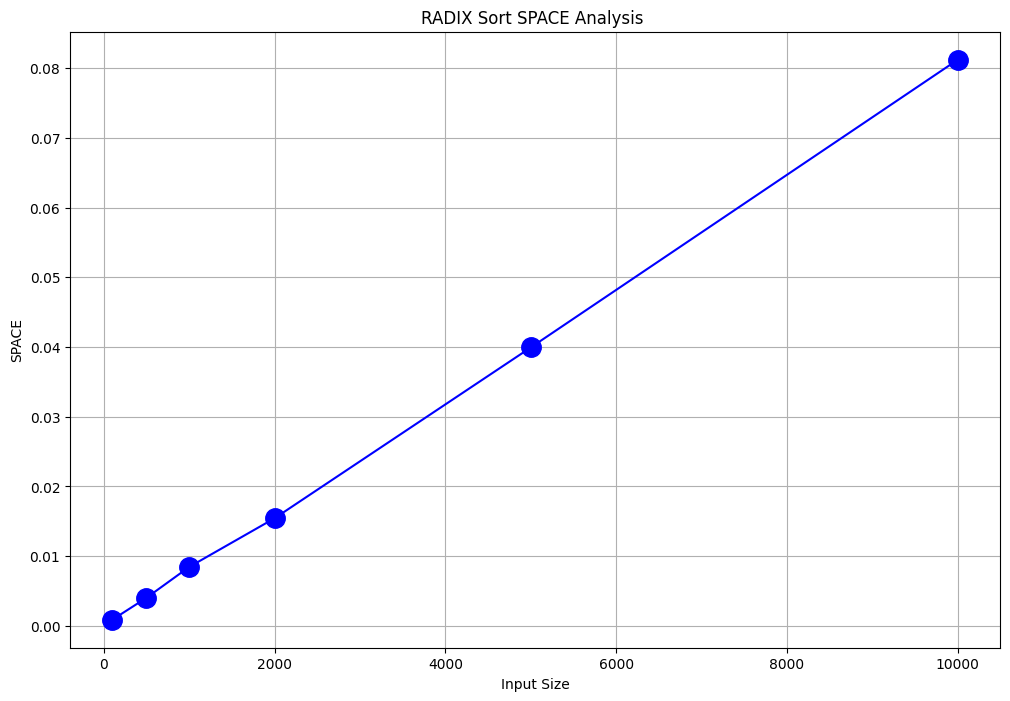

In [34]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(input_sizes, space[5], marker='o',color='b',markersize=14)

plt.xlabel('Input Size')
plt.ylabel('SPACE')
plt.title('RADIX Sort SPACE Analysis ')
plt.grid(True)
plt.show()

In [35]:
print(Total_execution)

[[0.00014099999680183828, 0.00103270000545308, 0.002351999981328845, 0.005416400003014132, 0.021285700000589713, 0.06539190001785755], [0.0002623999898787588, 0.0015477999986615032, 0.003352600004291162, 0.007635299989487976, 0.021097399992868304, 0.043724399991333485], [0.00027540000155568123, 0.0015591999981552362, 0.003435300022829324, 0.007710000005317852, 0.02144019998377189, 0.047595699987141415], [0.000997781753540039, 0.013002872467041016, 0.05201148986816406, 0.21104979515075684, 1.322296380996704, 3.7538440227508545], [0.00015369997709058225, 0.000448200007667765, 0.0007142999966163188, 0.0042261000198777765, 0.001434599980711937, 0.10195109999040142], [7.929999264888465e-05, 0.0003598000039346516, 0.0007492000004276633, 0.0015098000003490597, 0.003830100002232939, 0.007686099997954443]]


In [36]:
exe_time =  {100:Total_execution[0], 500:Total_execution[1], 1000:Total_execution[2],
             2000:Total_execution[3], 5000:Total_execution[4],10000:Total_execution[5]}

In [37]:
df = pd.DataFrame(exe_time)

In [38]:
df['Sorting Method'] = ['IN-PLACE QUICK SORT','MERGE SORT','HEAP SORT','INSERTION SORT','BUCKET SORT','RADIX SORT']

In [39]:
df = df[['Sorting Method'] + [col for col in df.columns if col != 'Sorting Method']]

In [40]:
df

,Sorting Method,100,500,1000,2000,5000,10000
0,IN-PLACE QUICK SORT,0.000141,0.000262,0.000275,0.000998,0.000154,0.000079
1,MERGE SORT,0.001033,0.001548,0.001559,0.013003,0.000448,0.000360
2,HEAP SORT,0.002352,0.003353,0.003435,0.052011,0.000714,0.000749
3,INSERTION SORT,0.005416,0.007635,0.007710,0.211050,0.004226,0.001510
4,BUCKET SORT,0.021286,0.021097,0.021440,1.322296,0.001435,0.003830
5,RADIX SORT,0.065392,0.043724,0.047596,3.753844,0.101951,0.007686


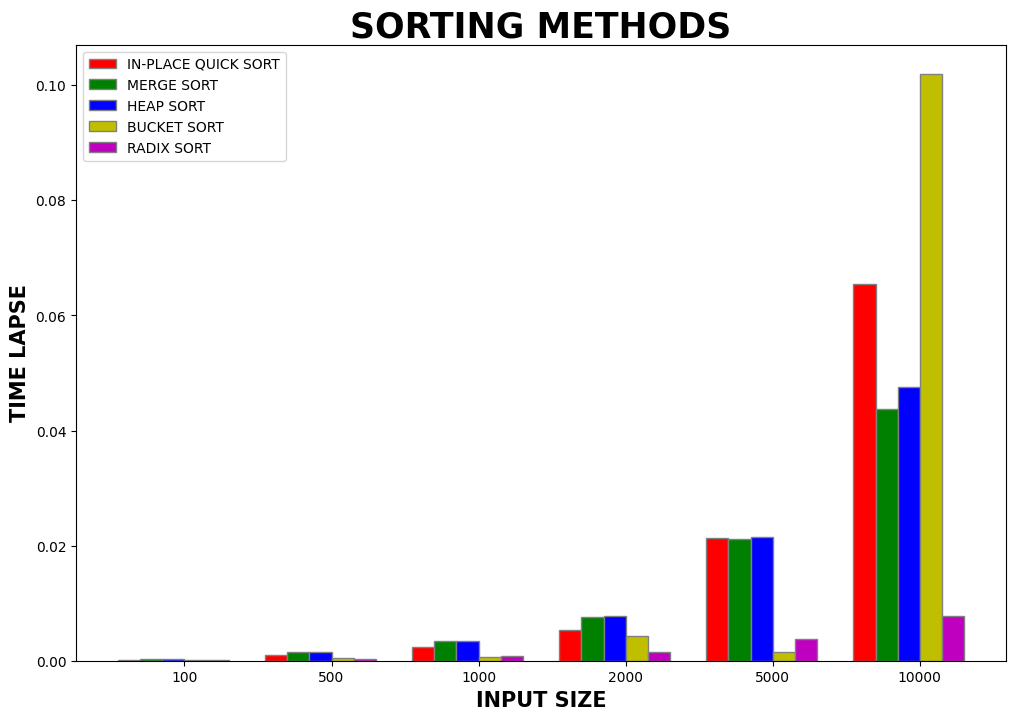

In [41]:
br1 = np.arange(len(Total_execution[0]))
barWidth = 0.15

# Adjust the x-positions for each set of bars to prevent overlapping
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]

fig, ax = plt.subplots(figsize=(12, 8))

plt.bar(br1, Total_execution[0], color='r', width=barWidth, edgecolor='grey', label='IN-PLACE QUICK SORT')
plt.bar(br2, Total_execution[1], color='g', width=barWidth, edgecolor='grey', label='MERGE SORT')
plt.bar(br3, Total_execution[2], color='b', width=barWidth, edgecolor='grey', label='HEAP SORT')
plt.bar(br4, Total_execution[4], color='y', width=barWidth, edgecolor='grey', label='BUCKET SORT')
plt.bar(br5, Total_execution[5], color='m', width=barWidth, edgecolor='grey', label='RADIX SORT')

plt.title('SORTING METHODS', fontweight='bold', fontsize=25)
plt.xlabel('INPUT SIZE', fontweight='bold', fontsize=15)
plt.ylabel('TIME LAPSE', fontweight='bold', fontsize=15)
plt.xticks([r + barWidth * 2.5 for r in range(len(Total_execution[0]))], [100, 500, 1000, 2000, 5000,10000])

plt.legend()
plt.show()







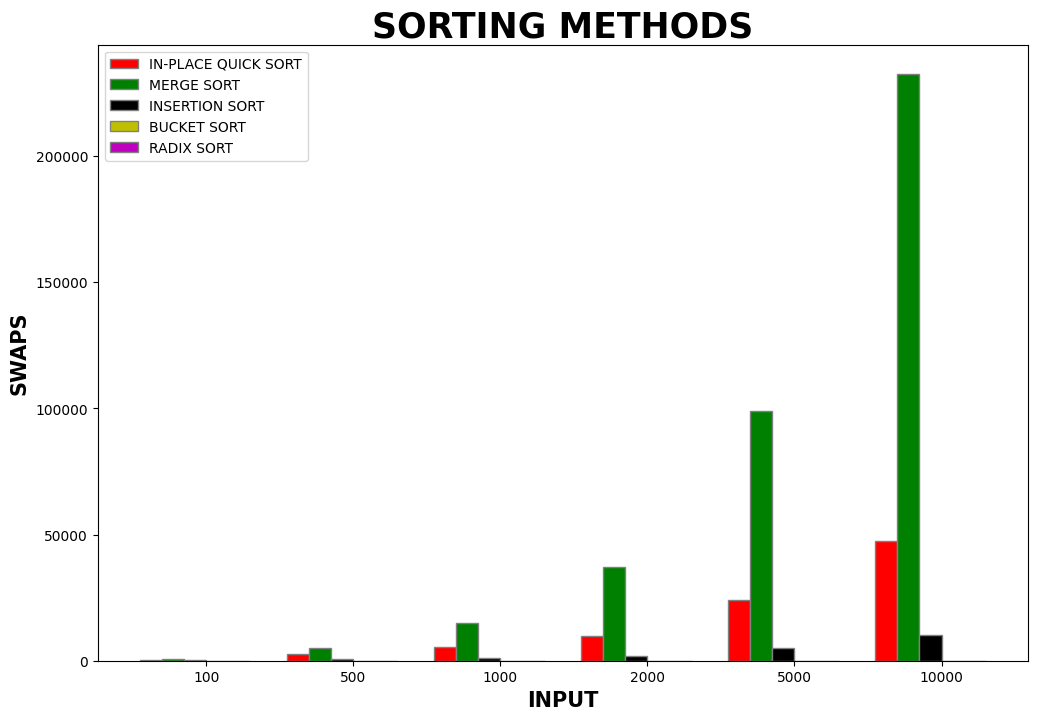

In [42]:
br1 = np.arange(len(Total_execution[0]))
barWidth = 0.15

# Adjust the x-positions for each set of bars to prevent overlapping
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]

fig, ax = plt.subplots(figsize=(12, 8))

plt.bar(br1, swap[0], color='r', width=barWidth, edgecolor='grey', label='IN-PLACE QUICK SORT')
plt.bar(br2, swap[1], color='g', width=barWidth, edgecolor='grey', label='MERGE SORT')
plt.bar(br3, swap[2], color='k', width=barWidth, edgecolor='grey', label='INSERTION SORT')
# plt.bar(br4, swap[3], color='b', width=barWidth, edgecolor='grey', label='HEAP SORT')
plt.bar(br4, swap[4], color='y', width=barWidth, edgecolor='grey', label='BUCKET SORT')
plt.bar(br5, swap[5], color='m', width=barWidth, edgecolor='grey', label='RADIX SORT')

plt.title('SORTING METHODS', fontweight='bold', fontsize=25)
plt.xlabel('INPUT', fontweight='bold', fontsize=15)
plt.ylabel('SWAPS', fontweight='bold', fontsize=15)
plt.xticks([r + barWidth * 2.5 for r in range(len(Total_execution[0]))], [100, 500, 1000, 2000, 5000,10000])

plt.legend()
plt.show()







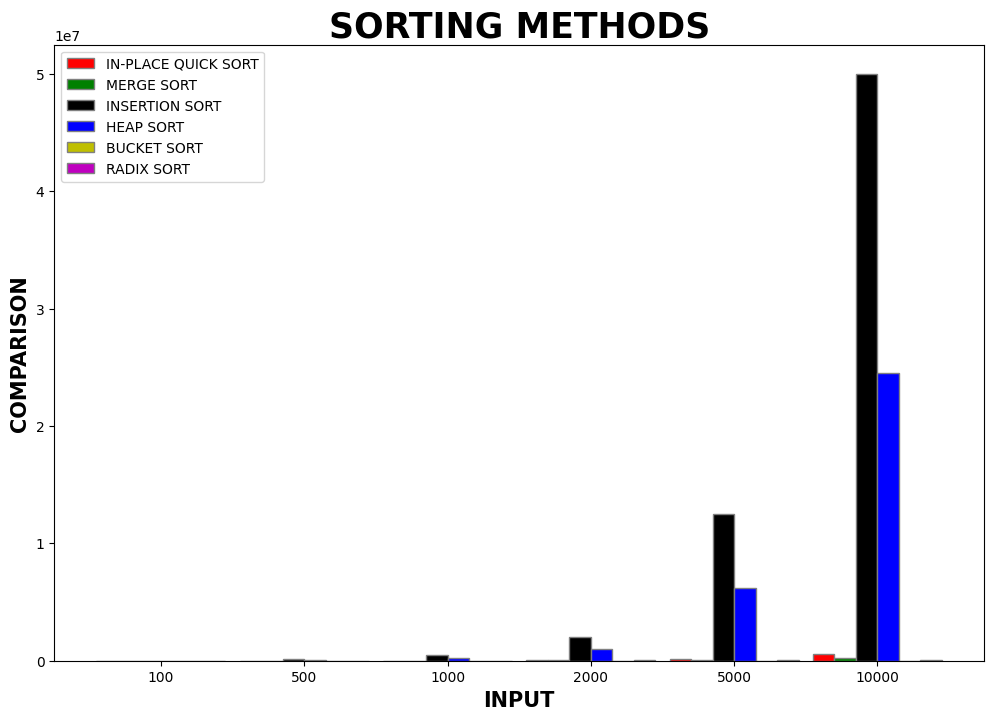

In [43]:
br1 = np.arange(len(Total_execution[0]))
barWidth = 0.15

# Adjust the x-positions for each set of bars to prevent overlapping
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]

fig, ax = plt.subplots(figsize=(12, 8))

plt.bar(br1, Compare[0], color='r', width=barWidth, edgecolor='grey', label='IN-PLACE QUICK SORT')
plt.bar(br2, Compare[1], color='g', width=barWidth, edgecolor='grey', label='MERGE SORT')
plt.bar(br3, Compare[2], color='k', width=barWidth, edgecolor='grey', label='INSERTION SORT')
plt.bar(br4, Compare[3], color='b', width=barWidth, edgecolor='grey', label='HEAP SORT')
plt.bar(br5, Compare[4], color='y', width=barWidth, edgecolor='grey', label='BUCKET SORT')
plt.bar(br6, Compare[5], color='m', width=barWidth, edgecolor='grey', label='RADIX SORT')

plt.title('SORTING METHODS', fontweight='bold', fontsize=25)
plt.xlabel('INPUT', fontweight='bold', fontsize=15)
plt.ylabel('COMPARISON', fontweight='bold', fontsize=15)
plt.xticks([r + barWidth * 2.5 for r in range(len(Total_execution[0]))], [100, 500, 1000, 2000, 5000,10000])

plt.legend()
plt.show()







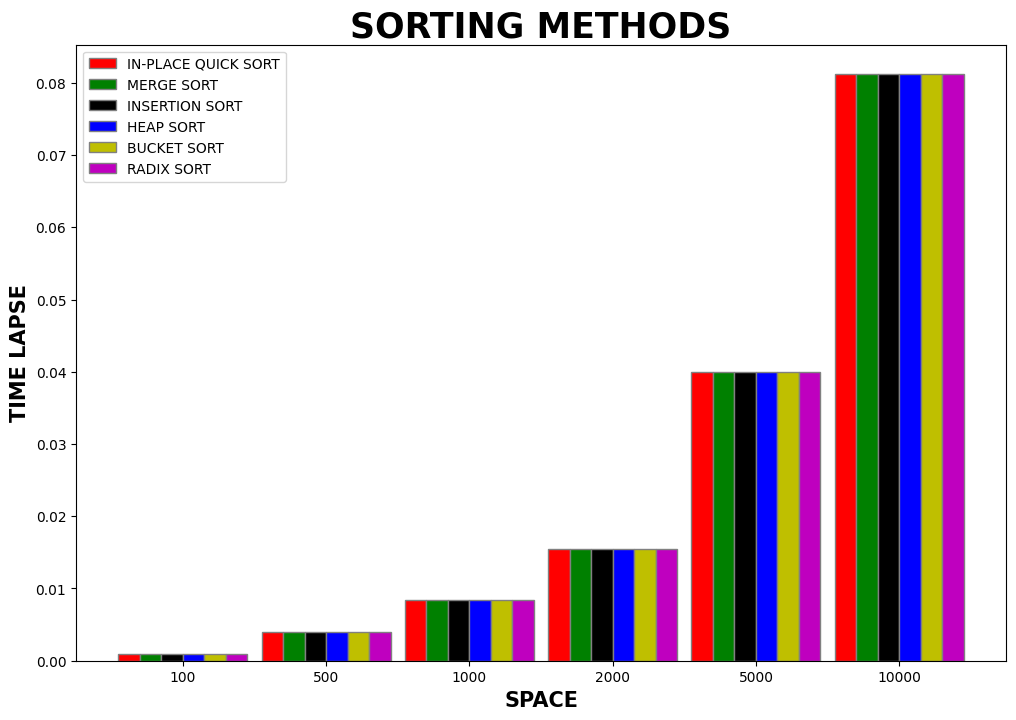

In [44]:
br1 = np.arange(len(Total_execution[0]))
barWidth = 0.15

# Adjust the x-positions for each set of bars to prevent overlapping
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]

fig, ax = plt.subplots(figsize=(12, 8))

plt.bar(br1, space[0], color='r', width=barWidth, edgecolor='grey', label='IN-PLACE QUICK SORT')
plt.bar(br2, space[1], color='g', width=barWidth, edgecolor='grey', label='MERGE SORT')
plt.bar(br3, space[2], color='k', width=barWidth, edgecolor='grey', label='INSERTION SORT')
plt.bar(br4, space[3], color='b', width=barWidth, edgecolor='grey', label='HEAP SORT')
plt.bar(br5, space[4], color='y', width=barWidth, edgecolor='grey', label='BUCKET SORT')
plt.bar(br6, space[5], color='m', width=barWidth, edgecolor='grey', label='RADIX SORT')

plt.title('SORTING METHODS', fontweight='bold', fontsize=25)
plt.xlabel('SPACE', fontweight='bold', fontsize=15)
plt.ylabel('TIME LAPSE', fontweight='bold', fontsize=15)
plt.xticks([r + barWidth * 2.5 for r in range(len(Total_execution[0]))], [100, 500, 1000, 2000, 5000,10000])

plt.legend()
plt.show()





